<a href="https://colab.research.google.com/github/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/01_Graphical_EDA_US_ElectionData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 
<strong> 
    <h1 align='center'>Graphical EDA  [2008 US swing state election result]
</h1> 
</strong>

---

<p align='center'>
  <a href="#">
    <img src='https://www.270towin.com/historical-presidential-elections/timeline/margin-of-victory/maps/2008_mov.png'>
  </a>
</p>


--- 
<strong> 
    <h1 align='center'>Swing State</h1> 
</strong>

---

__Clone the repository__ 

In [1]:
! git clone https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python.git

Cloning into 'CAREER-TRACK-Data-Scientist-with-Python'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 1898 (delta 19), reused 28 (delta 9), pack-reused 1857
Receiving objects: 100% (1898/1898), 200.33 MiB | 20.78 MiB/s, done.
Resolving deltas: 100% (671/671), done.
Checking out files: 100% (821/821), done.


__Change the current working directory__

In [2]:
# import os module 
import os 
   
# to specified path 
os.chdir('/content/CAREER-TRACK-Data-Scientist-with-Python/22_Statistical-Thinking-in-Python-[Part -1]/_datasets') 
  
# varify the path using getcwd() 
cwd = os.getcwd() 
  
# print the current directory 
print("Current working directory is:", cwd)

Current working directory is: /content/CAREER-TRACK-Data-Scientist-with-Python/22_Statistical-Thinking-in-Python-[Part -1]/_datasets


In [3]:
ls

2008_all_states.csv    belmont.csv  michelson_speed_of_light.csv
2008_swing_states.csv  iris.csv


## __Exploratory data analysis (EDA)__

__John Tukey's Comments on EDA -:__ "Often times **EDA** is too time consuming, so it is better to jump right in and do our **hypothesis** tests."

That statement is pretty absurd. If we don't have time to do EDA, we really don't have time to do **hypothesis** tests. And we should always do **EDA first**.

__“Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone.”__ — _John Tukey_

<p align='center'>
  <a href="#">
    <img src='https://miro.medium.com/max/900/1*vJULpN2xQfyVsvTVW-JSkA.png'>
  </a>
</p>



In [4]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Reading the dataframe in Pandas
df_swing = pd.read_csv('2008_swing_states.csv')
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


In [6]:
print('Total Democrat votes {}'.format(df_swing.dem_votes.sum()))
print('Total Republican votes {}'.format(df_swing.rep_votes.sum()))

Total Democrat votes 10481571
Total Republican votes 9376518


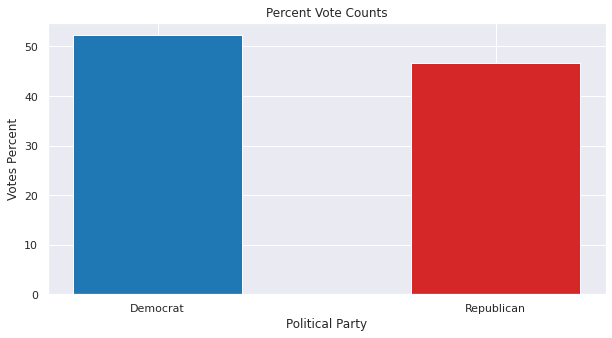

Total Vote Percantage of Democrat in 2008 is 52.21 percent
Total Vote Percantage of Republican in 2008 is 46.71 percent


In [7]:
# Percentage vote count Swing state
tvc = df_swing.total_votes.sum()
tdv = (df_swing.dem_votes.sum()/tvc)*100
trv = (df_swing.rep_votes.sum()/tvc)*100

# creating the dataset 
data = {'Democrat':tdv, 
        'Republican':trv}

keys = list(data.keys()) 
values = list(data.values()) 

# Set default Seaborn style
sns.set()

# set the plot size
fig = plt.figure(figsize = (10, 5)) 

# creating the bar plot 
plt.bar(keys, values, color=['tab:blue', 'tab:red'], width = 0.5) 
  
plt.xlabel("Political Party") 
plt.ylabel("Votes Percent")
plt.title("Percent Vote Counts") 
plt.show() 

# Vote Percent in 2008 election
print('Total Vote Percantage of Democrat in 2008 is {0:.2f} percent'.format(tdv))
print('Total Vote Percantage of Republican in 2008 is {0:.2f} percent'.format(trv))

In [8]:
df_swing.isna().sum()

state          0
county         0
total_votes    0
dem_votes      0
rep_votes      0
dem_share      0
dtype: int64

In [9]:
print(df_swing.columns )
print(df_swing.state.value_counts())
print(df_swing.shape)

Index(['state', 'county', 'total_votes', 'dem_votes', 'rep_votes',
       'dem_share'],
      dtype='object')
OH    88
FL    67
PA    67
Name: state, dtype: int64
(222, 6)


In [10]:
df_swing.describe()

,total_votes,dem_votes,rep_votes,dem_share
count,222.000000,222.000000,222.000000,222.000000
mean,90424.513514,47214.283784,42236.567568,43.764414
std,142285.290653,88913.077046,56208.862490,10.712770
min,2245.000000,642.000000,1323.000000,6.800000
25%,16537.250000,6337.500000,9203.750000,37.302500
50%,32491.000000,14392.000000,18050.500000,43.185000
75%,95516.750000,41623.000000,50651.750000,49.925000
max,863486.000000,595980.000000,360551.000000,83.560000


In [11]:
# Democratic share
df_swing[['state', 'county', 'dem_share']].head()

,state,county,dem_share
0,PA,Erie County,60.08
1,PA,Bradford County,40.64
2,PA,Tioga County,36.07
3,PA,McKean County,41.21
4,PA,Potter County,31.04


## __Histograms__

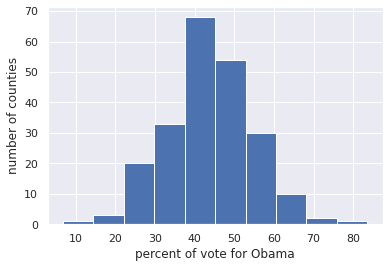

In [12]:
sns.set()
_ = plt.hist(df_swing['dem_share'])
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')

plt.show()

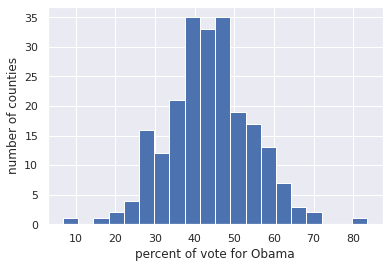

In [13]:
# Set default Seaborn style
sns.set()

# Histograms with different binning
_ = plt.hist(df_swing['dem_share'], bins=20)
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')
plt.show()

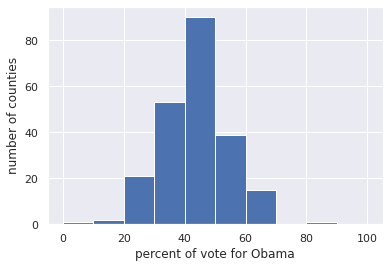

In [14]:
bin_edges = [0, 10, 20, 30, 40, 50,
60, 70, 80, 90, 100]

sns.set()
_ = plt.hist(df_swing['dem_share'], bins=bin_edges)
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')


plt.show()

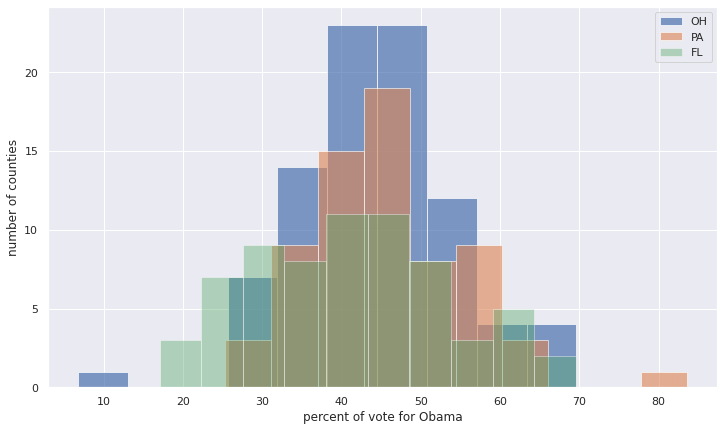

In [15]:
# display records only with states
ohio = df_swing.loc[df_swing["state"] == "OH"]
penn = df_swing.loc[df_swing["state"] == "PA"]
florida = df_swing.loc[df_swing["state"] == "FL"]

oh = ohio['dem_share']
pa = penn['dem_share']
fl = florida['dem_share']

# Set default Seaborn style
sns.set()

plt.figure(figsize=(12, 7))

# Histograms with different binning
plt.hist(oh, label='OH', alpha = 0.7)
plt.hist(pa, label='PA', alpha = 0.6)
plt.hist(fl, label='FL', alpha = 0.4)
plt.xlabel('percent of vote for Obama')
plt.ylabel('number of counties')
plt.legend()
plt.show()

## __Swarm Plot__

$\color{red}{\textbf{Note:}}$ 

The **same data set can look different depending on how the bins are chosen**. And choice of bins is in many ways arbitrary. This leads to **Binning bias**
that is we might interpret our plot differently for two different choices of bin number.

>An **additional problem with histograms** is that we are not plotting all of the data. We are sweeping the data into bins, and losing their actual values.

To remedy these problems we can make a bee swarm plot, also called a **swarm plot**. 

In the IPython Shell, you can use `sns.swarmplot`? or help(`sns.swarmplot`) for more details on how to make bee swarm plots using seaborn.

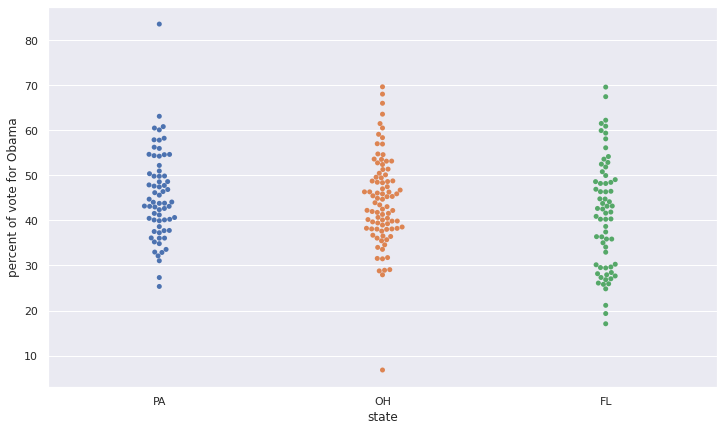

In [16]:
plt.figure(figsize=(12, 7))

# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x='state', y='dem_share', data=df_swing)

# Label the axes
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for Obama')

# Show the plot
plt.show()

## __Empirical cumulative distribution function (ECDF)__

The **bee swarm** plot has a r**eal problem**. the **edges have overlapping data points**, which was necessary in order to fit all points onto the plot.

We are now obfuscating data. So, using a bee **swarm plot** here is **not** the best option. As an alternative, **Empirical cumulative distribution function (ECDF).**

Sometimes the **observations** in a collected data sample **do not fit** any known **probability distribution** and cannot be easily forced into an existing distribution by __data transforms__ or __parameterization__ of the distribution function.Instead, an __Empirical probability distribution__ must be used.

---
There are __two main types of probability distribution functions__ we may need to sample; they are:

- __Probability Density Function (PDF)__
    - The __PDF__ returns the expected probability for observing a value. For __discrete data__, the __PDF__ is referred to as a __Probability Mass Function (PMF)__.
- __Cumulative Distribution Function (CDF)__
    - The __CDF__ returns the expected probability for observing a value __less than or equal to a given value.
---
An __Empirical probability density function__ can be __fit__ and used for a data sampling using a __Non-Parametric density estimation__ method, such as __Kernel Density Estimation (KDE)__.

>__kernel density estimation ( KDE)__ is a __non-parametric__ way to estimate the __Probability Density Function__ of a random variable. Kernel density estimation is a fundamental __Data Smoothing__ problem where inferences about the population are made, based on a __finite data sample__.


>An **ECDF** is an estimator of the **Cumulative Distribution Function**. The ECDF essentially allows you to plot a feature of our data in order from *least to greatest and see the whole feature as if is distributed across the data set*.

The **EDF is calculated** by ordering all of the **unique observations** in the data sample and calculating the **Cumulative probability** for each as the number of observations less than or equal to a given observation divided by the total number of observations.



### __CDF vs ECDF__

**CDF** is a **hypothetical model** of a distribution, the **ECDF models** empirical (i.e. **observed**) data. To put this another way, the ECDF is the **probability distribution** you would get if you sampled from your sample, instead of the population.

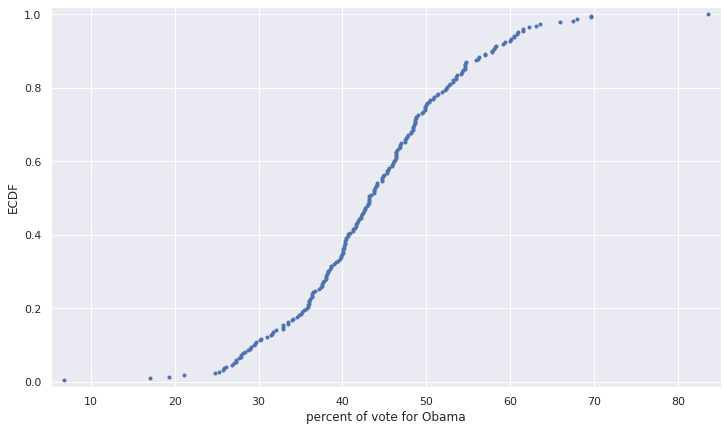

In [17]:
# 2008 US swing state election ECDF
import numpy as np

#ECDF
x = np.sort(df_swing['dem_share'])
y = np.arange(1, len(x)+1) / len(x)

plt.figure(figsize=(12, 7))

# Ploting ECDF
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('ECDF')
plt.margins(0.02) # Keeps data off plot edges
plt.show()

__Graph Interpretation__

- 20% of counties had 36% or less vote for Obama.
- 75% of counties had less than half vote for Obama.

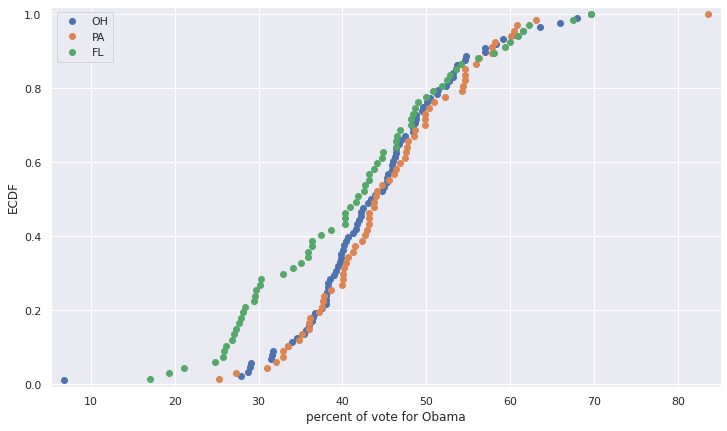

In [18]:
# Comparison of ECDFs

a = np.sort(oh)
b = np.sort(pa)
c = np.sort(fl)

x = np.arange(1, len(a)+1) / len(a)
y = np.arange(1, len(b)+1) / len(b)
z = np.arange(1, len(c)+1) / len(c)

plt.figure(figsize=(12, 7))

# Ploting ECDF
plt.plot(a, x, marker='o', linestyle='none', label='OH')
plt.plot(b, y, marker='o', linestyle='none', label='PA')
plt.plot(c, z, marker='o', linestyle='none', label='FL')

plt.xlabel('percent of vote for Obama')
plt.ylabel('ECDF')
plt.margins(0.02) # Keeps data off plot edges
plt.legend()
plt.show()

## __Summary Statistics: The sample Mean and Median__ [Quantitative exploratory data analysis]

>**Outliers:**
Data points whose value is far greater or less than most of
the rest of the data.

>$\color{red}{\textbf{Note:}}$ `inf` used for setting a variable with an infinitely large value.

__The Median:__

Sort the the data and choosing the datum in the __Middle__. Because it is derived from the __ranking of sorted data__, and not on the values of the data, the __Median is immune to data that take on extreme values__.

- The median is a special name for the __50th percentile__.

>$\color{red}{\textbf{Note:}}$
An **outlier** can significantly affect the value of the __Mean__, but not the **Median**.






In [19]:
# vote shares
vote_share_PA = df_swing.loc[df_swing["state"] == "PA"]
np.mean(vote_share_PA)

total_votes    89479.656716
dem_votes      48900.940299
rep_votes      39640.074627
dem_share         45.476418
dtype: float64

In [20]:
# democratic vote share in PA 
print('Mean:{}'.format(np.mean(vote_share_PA.dem_share)))
print('Median: {}'.format(np.median(vote_share_PA.dem_share)))

Mean:45.476417910447765
Median: 44.03


In [21]:
df_swing.county.describe()

count              222
unique             187
top       Union County
freq                 3
Name: county, dtype: object

In [22]:
# Test if pattern or regex is contained within a string of a Series or Index.
df_swing.county.str.contains('ut').values # for Utha county

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [23]:
# Mean and median Vote share for washington County
wash_c = df_swing.loc[df_swing["county"] == "Washington County"]
print(np.mean(wash_c))

total_votes    42660.000000
dem_votes      16741.000000
rep_votes      25316.333333
dem_share         26.780000
dtype: float64


### __Combine Box and Swarmplot__ 

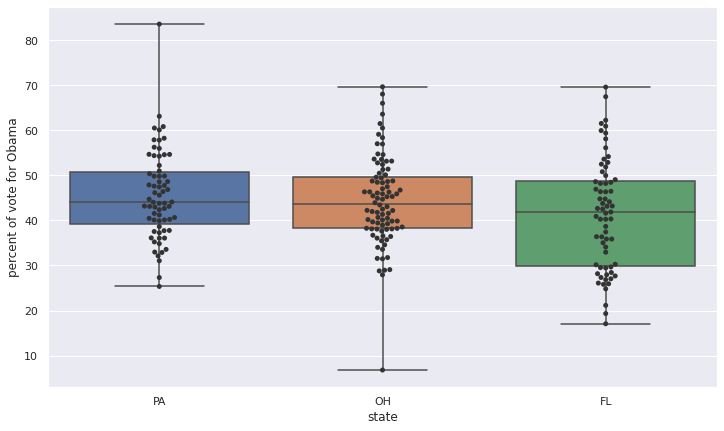

In [24]:
plt.figure(figsize=(12, 7))

# Create bee swarm plot with Seaborn's default settings
_ = sns.boxplot(x='state', y='dem_share', data=df_swing, whis=np.inf) 
_ = sns.swarmplot(x='state', y='dem_share', data=df_swing, color=".2")

# Label the axes
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for Obama')

# Show the plot
plt.show()

In [25]:
# Percentile
np.percentile(df_swing['dem_share'], [25, 50, 75])

array([37.3025, 43.185 , 49.925 ])

### **Variance** and **standard deviation**

<p align='center'>
    <a href='#'><img src='https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/22_Statistical-Thinking-in-Python-%5BPart%20-1%5D/_png/SDvsVar.png?raw=**true**'></a>
</p>

>__Variance__ is the mean **squared distance** of the data from their **mean**. Informally, a measure of the ***spread of data***.

$$ variance = \dfrac{1}{n}\sum^{n}_{i=1}(x_i - \bar{x})^2 $$

>__Standard Deviation__  is a measure that is used to **quantify** the amount of ***variation*** or ***dispersion*** of a set of data values.

$$ Standard Deviation = \sqrt{\dfrac{\sum(x_i - \bar{x})^2}{n - 1}} $$

In [26]:
# Display records only with states 
florida = df_swing.loc[df_swing["state"] == "FL"]

# Computing the variance
print('Variance {0:.2f}'.format(np.var(florida.dem_share)))

# Computing the Standard Deviation
print('Standard Deviation {0:.2f}'.format(np.std(florida.dem_share)))

Variance 147.44
Standard Deviation 12.14


### **Covariance** and the **Pearson correlation coefficient**


mean total votes 90.42
mean percent for obama 43.76


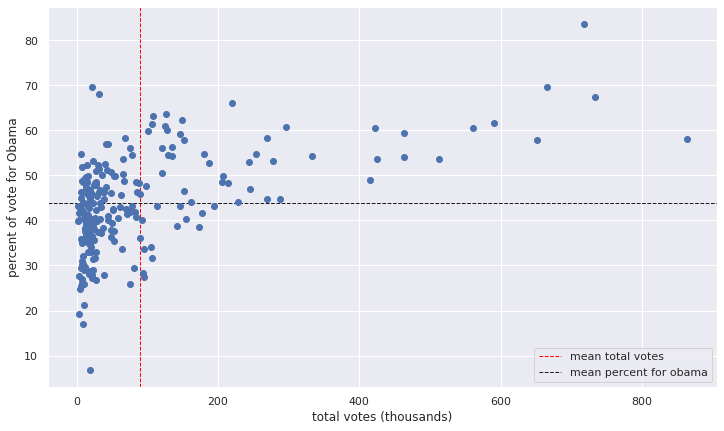

In [27]:
# Total swing votes
total_votes = df_swing.total_votes

# Democrates Share
demcrats_share = df_swing.dem_share

print('mean total votes {0:.2f}'.format((total_votes/1000).mean()))
print('mean percent for obama {0:.2f}'.format(demcrats_share.mean()))

# Set default Seaborn style
sns.set()

# figure size
plt.figure(figsize=(12, 7))

# vertical mean line 
plt.axvline((total_votes/1000).mean(), color='red',
            linestyle='dashed', linewidth=1,
            label='mean total votes')

# horizontal mean line
plt.axhline(demcrats_share.mean(), color='k',
            linestyle='dashed', linewidth=1,
            label='mean percent for obama')
# Plot
_ = plt.plot(total_votes/1000, demcrats_share, marker='o', linestyle='none')
_ = plt.xlabel('total votes (thousands)')
_ = plt.ylabel('percent of vote for Obama')
_ = plt.legend()
plt.show()

***The twelve most populous counties all voted for Obama, and that most of the counties with small populations voted for McCain.***

The mean total votes. We can compute these differences for each data point.

The **covariance** is the mean of the product of these differences. If x and y both tend to be above, or both below their respective means together, as they are in this data set, then the **covariance is positive** i.e (positively correlated) when **x is high**, so is **y**; when the county is **populous**, it has more votes for Obama.

Conversely, if **x is high** while **y is low**, the covariance is negative, and the data are **negatively correlated**, or **anticorrelated**, which is not the case for this data set.




#### __Covariance__ 

it is the measure of how the two quantities vary together.

- Covariance is a measure of the relationship between two random variables and to what extent, they change together. Or we can say, in other words, it defines the changes between the two variables, such that change in one variable is equal to change in another variable.

- If the covariance for any two variables is positive, that means, both the variables move in the same direction. Here, the variables show similar behaviour.

$$ covariance = \dfrac{1}{n}\sum^{n}_{i=1}(x_i - \bar{x})(y_i - \bar{y})$$




[[20245.10393632   817.30936184]
 [  817.30936184   114.76344739]]
817.3093618405288


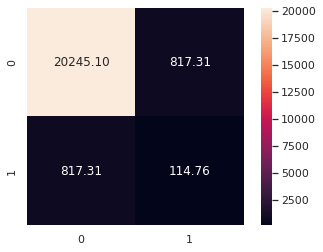

In [28]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov((total_votes/1000), demcrats_share )

sns.heatmap(covariance_matrix,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12}
                 )

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0, 1]

# Print the length/width covariance
print(petal_cov)

#### __Pearson correlation coefficient__


We can compute the **covariance** using built-in NumPy functions. However, if we want to have a more **generally applicable measure** of **how two variables depend on each other**, we want it to be **dimensionless**, that is to not have any units.

So, we can divide the covariance by the ***standard deviations of the x and y variables***. This is called the Pearson correlation coefficient, usually denoted by the Greek letter rho.

#### ___Why is the Pearson correlation coefficient important?___

It helps in knowing **how strong the relationship between the two variables** is. Not only the presence or the absence of the correlation between the two variables is indicated using the Pearson Correlation Coefficient but it also determines the **exact extent to which those variables are correlated**.


The **Pearson coefficient correlation** has a **high statistical significance**. It looks at the relationship between two variables. It seeks to draw a line through the data of two variables to show their relationship. The relationship of the variables is measured with the help Pearson correlation coefficient calculator.

$$ \begin{align} \rho &= \text{Pearson correlation} = \dfrac{\text{covariance}}{(\text{std of x})(\text{std of y})} \\ &= \dfrac{\text{variability due to codependence}}{\text{independent variability}} \end{align}$$

In [29]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays
    
    Args:
        x: arrays
        y: arrays
        
    returns:
        r: int
    """
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)
    
    # Return entry[0, 1]
    return corr_mat[0, 1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r((total_votes/1000), demcrats_share)

# Print the result
print(r)

0.5361973649586781


In [30]:
ls

2008_all_states.csv    belmont.csv  michelson_speed_of_light.csv
2008_swing_states.csv  iris.csv


--- 
<strong> 
    <h1 align='center'>All State</h1> 
</strong>

---

In [31]:
# Reading the dataframe in Pandas
all_state = pd.read_csv('2008_all_states.csv')
all_state.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west


<p align='center'> 
    <a href="https://twitter.com/F4izy"> 
        <img src="https://th.bing.com/th/id/OIP.FCKMemzqNplY37Jwi0Yk3AHaGl?w=233&h=207&c=7&o=5&pid=1.7" width=50px 
            height=50px> 
    </a> 
    <a href="https://www.linkedin.com/in/mohd-faizy/"> 
        <img src='https://th.bing.com/th/id/OIP.idrBN-LfvMIZl370Vb65SgHaHa?pid=Api&rs=1' width=50px height=50px> 
    </a> 
</p>